# 데이터의 범위와 분포를 표현하는 바이올린플롯

## 1. 라이브러리와 샘플데이터 설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus']= False

In [3]:
# 샘플 데이터 : 125명의 점수 데이터
import numpy as np

scores = np.random.randint(0,101,125)

scores.sort()
scores

array([  0,   1,   3,   4,   5,   5,   5,   6,   8,   9,  10,  11,  12,
        12,  12,  12,  13,  13,  14,  15,  15,  15,  16,  16,  18,  19,
        19,  19,  20,  21,  21,  23,  24,  25,  26,  27,  30,  34,  35,
        35,  36,  37,  37,  39,  40,  41,  43,  43,  44,  44,  46,  46,
        47,  47,  47,  48,  48,  49,  50,  50,  51,  52,  52,  53,  53,
        54,  54,  55,  55,  56,  56,  57,  58,  58,  59,  59,  59,  60,
        60,  60,  60,  60,  61,  61,  62,  64,  64,  66,  67,  67,  68,
        70,  70,  71,  71,  72,  74,  74,  74,  77,  77,  78,  78,  79,
        79,  80,  80,  82,  82,  83,  83,  84,  85,  85,  86,  87,  87,
        87,  88,  89,  90,  90,  95,  96, 100])

## 2. 바이올린 플롯
* plt.violinplot(data)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f25870fa710>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f25870fa990>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f25870fa910>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f25870fa950>}

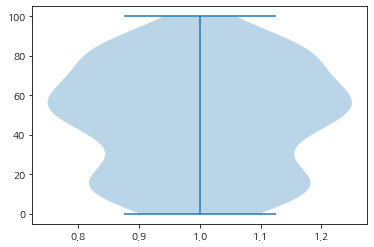

In [4]:
plt.violinplot(scores)
# 50점대 학생이 많고 30점대 학생이 적다.

### 2.1. 최대값, 최소값, 평균값, 중간값
* showextrema=True/False : 최대값, 최소값에 직선표시 (default: True)
* showmeans=True/False : 평균값에 직선표시 (default: False)
* showmedians=True/False : 중간값에 직선표시 (default: False)

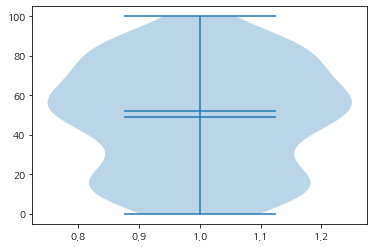

In [8]:
plt.violinplot(scores, showmeans=True, showmedians=True)
plt.show()

### 2.2. 분위수 지정하기
* quantiles=0~1사이의 실수리스트

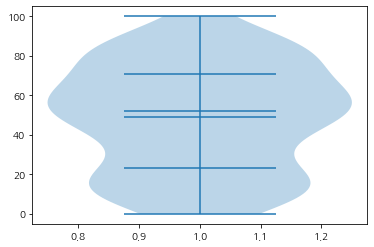

In [9]:
plt.violinplot(scores, showmeans=True, showmedians=True, quantiles=[0.25,0.75])
plt.show()

### 2.3. 스타일 지정하기
* 바이올린플롯 객체를 받아서 스타일을 지정한다.
* 플롯['bidies'][인덱스].set_facecolor(컬러)
* 플롯['cmins'].set_edgecolor(컬러)
* 플롯['cmaxes'].set_edgecolor(컬러)
* 플롯['cbars'].set_edgecolor(컬러)
* 플롯['cmedians'].set_edgecolor(컬러)
* 플롯['cquantiles'].set_edgecolor(컬러)
* 플롯['cmeans'].set_edgecolor(컬러)

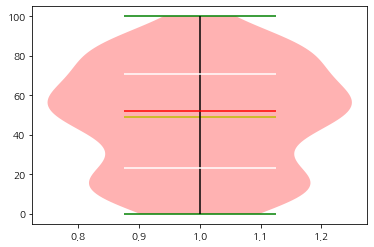

In [15]:
v1 = plt.violinplot(scores, showmeans=True, showmedians=True, quantiles=[0.25,0.75])
v1['bodies'][0].set_facecolor('r')
v1['cmins'].set_edgecolor('g')
v1['cmaxes'].set_edgecolor('g')
v1['cbars'].set_edgecolor('k')
v1['cmedians'].set_edgecolor('r')
v1['cquantiles'].set_edgecolor('w')
v1['cmeans'].set_edgecolor('y')
plt.show()

## 3. 여러 개의 데이터 비교하기

In [16]:
# 샘플데이터 : iris data
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3.1. 바이올릿 플롯 기본 그리기
* plt.violinplot(datalist)

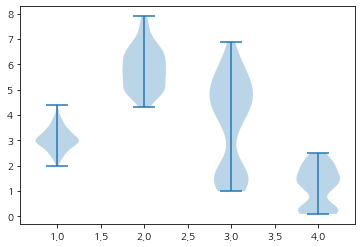

In [19]:
plt.violinplot([iris['sepal_width'],iris['sepal_length'],iris['petal_length'],iris['petal_width']])
plt.show()

### 3.2. x틱

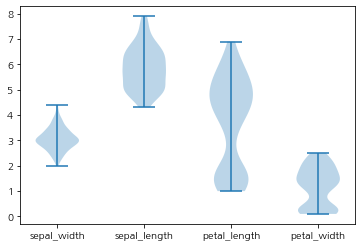

In [20]:
plt.violinplot([iris['sepal_width'],iris['sepal_length'],iris['petal_length'],iris['petal_width']])
plt.xticks(range(1,5), labels=['sepal_width','sepal_length','petal_length','petal_width'])
plt.show()

### 3.3. 평균값, 중간값 표시

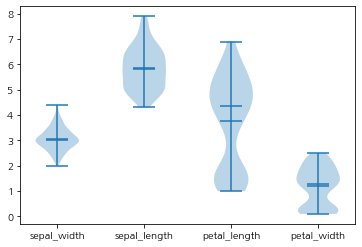

In [21]:
plt.violinplot([iris['sepal_width'],iris['sepal_length'],iris['petal_length'],iris['petal_width']],
               showmeans=True, showmedians=True)
plt.xticks(range(1,5), labels=['sepal_width','sepal_length','petal_length','petal_width'])
plt.show()

### 3.4. 분위 수 표시

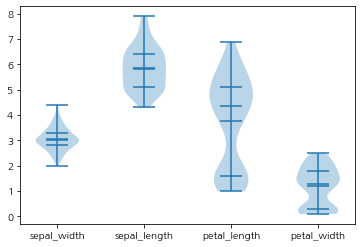

In [23]:
plt.violinplot([iris['sepal_width'],iris['sepal_length'],iris['petal_length'],iris['petal_width']],
               showmeans=True, showmedians=True, quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75],[0.25,0.75]])
plt.xticks(range(1,5), labels=['sepal_width','sepal_length','petal_length','petal_width'])
plt.show()
# 분위수도 각각 전부 지정해줘야한다.

### 3.5. 스타일 지정하기

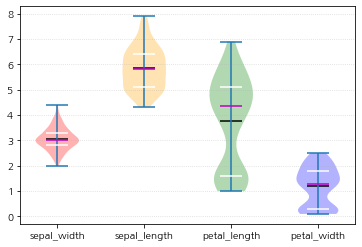

In [29]:
v2= plt.violinplot([iris['sepal_width'],iris['sepal_length'],iris['petal_length'],iris['petal_width']],
               showmeans=True, showmedians=True, 
               quantiles=[[0.25,0.75],[0.25,0.75],[0.25,0.75],[0.25,0.75]])

# 바디 색 변경
v2['bodies'][0].set_facecolor('r')
v2['bodies'][1].set_facecolor('orange')
v2['bodies'][2].set_facecolor('g')
v2['bodies'][3].set_facecolor('b')
# 중간값 색 변경
v2['cmedians'].set_edgecolor('m')
# 평균 색 변경
v2['cmeans'].set_edgecolor('k')
# 분위수 색 변경
v2['cquantiles'].set_edgecolor('w')


plt.xticks(range(1,5), labels=['sepal_width','sepal_length','petal_length','petal_width'])

# 그리드
plt.grid(axis='y',ls=':',alpha=0.5)
plt.show()

# 데이터의 비율을 표현하는 파이차트

## 1. 샘플 데이터

In [30]:
# 2019년 병역판정검사 - 혈액형 분포
blood_type = ['A',"B","O","AB"]
personnel = [111901,87066,86804,36496]
# 수치의 합을 넣어줘야함

## 2. 파이차트
* 전체에 대한 각 부분의 비율을 부채꼴 모양으로 나타낸 그래프이다.
* 각 부채꼴의 중심각이 전체에서 해당 데이터가 차지하는 비율을 나타낸다.
* 1차원 리스트/배열/시리즈를 이용하여 그린다.

### 2.1. 기본 파이차트 그리기
* plt.pie(data)

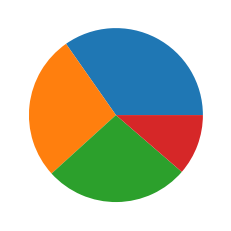

In [31]:
plt.pie(personnel)
plt.show()

### 2.2. 레이블 달기
* labels=label 목록
* labeldistance = 그래프와 레이블의 간격 (default=1.1)

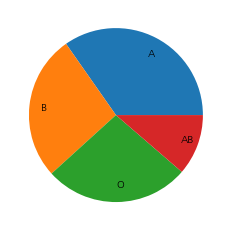

In [34]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=0.8)
plt.show()
# 레이블을 안에 넣을 수도 있다. 그래프의 경계선이 1

### 2.3. 비율 표시하기
* autopct = '%.소수점자리수f%%'
* pctdistance = 반지름을 1이라고 할 때 중심에서의 거리 (default=0.6)

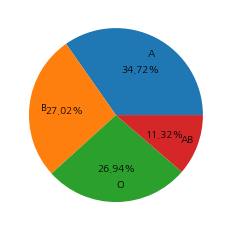

In [37]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=0.8,
        autopct='%.2f%%', pctdistance=0.6)
plt.show()

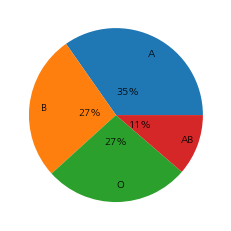

In [38]:
# 정수만 표현
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=0.8,
        autopct='%.f%%', pctdistance=0.3)
plt.show()

### 2.4. 돌출효과
* explode=돌출정도리스트
* 반지름의 길이를 1이라고 했을 때를 기준으로 하여 돌출정도를 지정

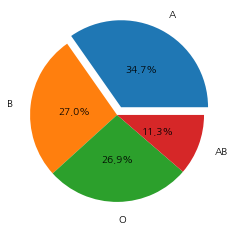

In [41]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0])
plt.show()

### 2.5. 색상 바꾸기
* color= 색상리스트

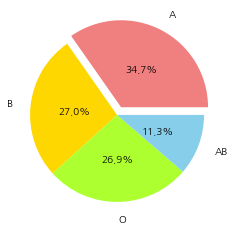

In [42]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'])
plt.show()

### 2.6. 시작각도
* startrange = 시작각도
* 기본 시작각도는 3시 방향
* 시작 각도를 지정하면 3시방향으로부터 반 시계 방향으로 각도만큼 이동하여 시작

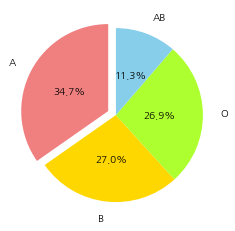

In [43]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90)
plt.show()

### 2.7. 회전방향
* counterclock=True/False (반시계/시계)

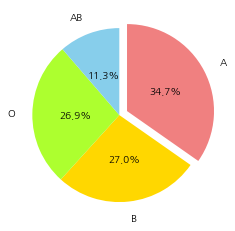

In [45]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False)
plt.show()

### 2.8. 범례
* legend(레이블리스트)

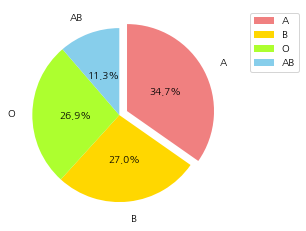

In [51]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False)
plt.legend(loc=(1.1,0.7))
plt.show()

### 2.9. 반지름
* radius = 반지름 (default=1)

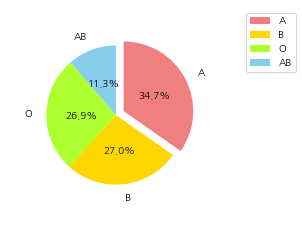

In [52]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False, radius =0.8)
plt.legend(loc=(1.1,0.7))
plt.show()

### 2.10. 부채꼴 스타일
* wedgeprops = {'ec':테두리컬러, 'lw':선 두께,'ls':선 스타일, 'width':반지름에 대한 비율}

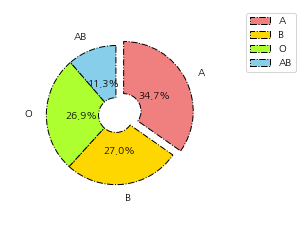

In [60]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False, radius =0.8,
        wedgeprops={'ec':'k', 'lw':1, 'ls':'-.', 'width':0.6})
plt.legend(loc=(1.1,0.7))
plt.show()

### 2.11. 폰트
* textprops = {'fontsize':폰트사이즈, 'color':폰트컬러, 'rotation':폰트회전각도}

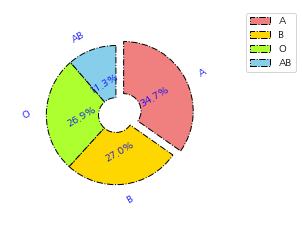

In [63]:
plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False, radius =0.8,
        wedgeprops={'ec':'k', 'lw':1, 'ls':'-.', 'width':0.6},
        textprops= {'fontsize':10, 'color':'b', 'rotation':30})
plt.legend(loc=(1.1,0.7))
plt.show()

### 2.12. 그래프 꾸미기

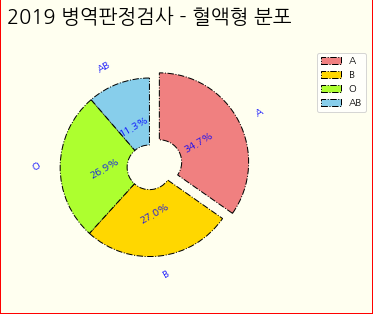

In [73]:
plt.figure(figsize=(5,9), facecolor='ivory',edgecolor='red',linewidth=2)
plt.title('2019 병역판정검사 - 혈액형 분포', size=20)

plt.pie(personnel, labels=['A',"B","O","AB"], labeldistance=1.2,
        autopct='%.1f%%', pctdistance=0.5, explode=[0.1,0,0,0],
        colors=['lightcoral','gold','greenyellow','skyblue'],
        startangle=90, counterclock=False, radius =0.8,
        wedgeprops={'ec':'k', 'lw':1, 'ls':'-.', 'width':0.6},
        textprops= {'fontsize':10, 'color':'b', 'rotation':30})
plt.legend(loc=(1.1,0.7))
plt.show()